# Udacity: Intro to Data Analysis Project

#### Purpose

The purpose of this notebook is to explore the data of the survivors of the titantic. And, to gleam any factors that may have contributed to a suvivor survival. 

The raw data set can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv).

The description of the data set can be found [here](https://www.kaggle.com/c/titanic/data).

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Processing the Data

In [4]:
data_file = 'titanic-data.csv'

titanic_raw_df = pd.read_csv(data_file, header=0)

In [6]:
titanic_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


After loading the csv into python and small visual check of the data. I want to examine the data types of the columns and the number of vaules for each row.

In [27]:
titanic_raw_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
row, col = titanic_raw_df.shape
print("The shape of the overall dataframe is {0} by {1}".format(row, col))
print()
print(titanic_raw_df.info())

The shape of the overall dataframe is 891 by 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


There are a total of __891__ rows; however, __age, cabin, and emarked __ seem to have values missing. Emarked is missing 2, age is missing 150 entries, and cabin is missing 687. Cabin is quite interesting because one might think they would have the complete records of who should be assigned to each cabin. But, that might not be the case.

Regarding the data types of each column. No column seems unusual. Values that are considered 'numerical' like age and fare are ints and floats respectively. And, string type values are objects. So, I will proceed and look at the numerical columns' summary statistics ie mean, medium, etc.

In [26]:
titanic_raw_df[['Age', 'SibSp','Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Age seems fairly responsible. The IQR is from 20 to 38, so about 50% were adults.

The sibling and parent-child data seems a little suprising. I had expected more people to travel with family. Since the number of relationships can be grouped by whole numbers. I will look at the counts to a more granural analysis. 

The fare's mean is about 32 pounds, or 3400 pounds today(4452 dollars). The fare's max seems a little strange. The max value is 512 pounds, the value seems a little high. If you adjust for inflation that would be about 55k pounds or $72k.

In [72]:
#titanic_raw_df['Age'].dropna().values

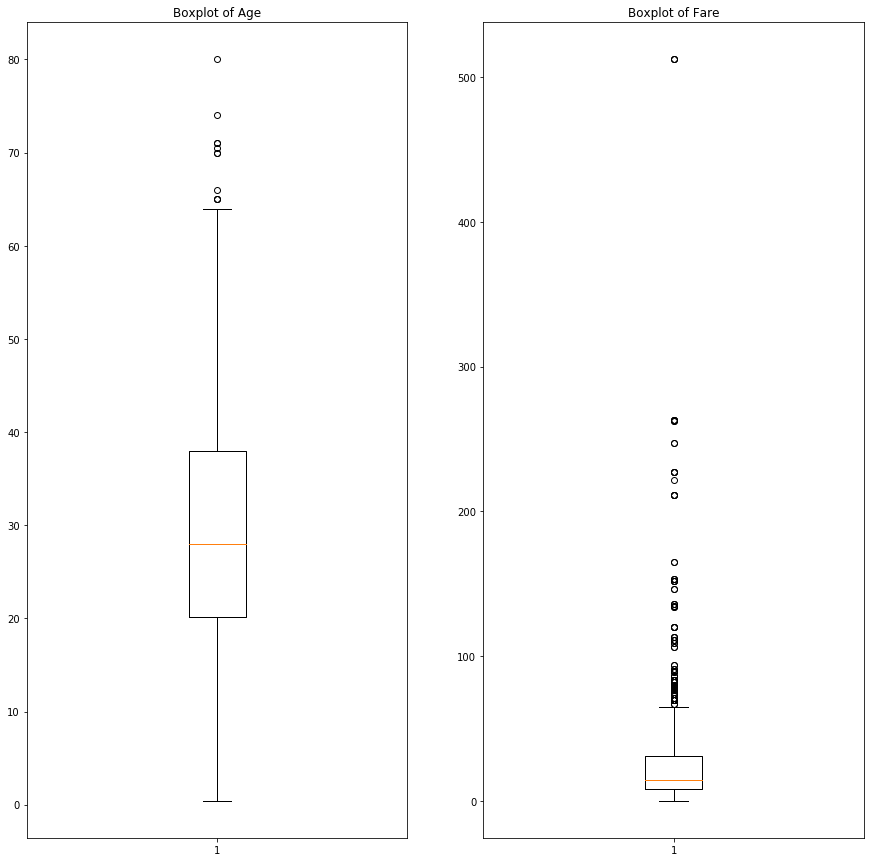

In [79]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].boxplot(titanic_raw_df['Age'].dropna().values)
ax[0].set_title("Boxplot of Age")

ax[1].boxplot(titanic_raw_df['Fare'].dropna().values)
ax[1].set_title("Boxplot of Fare")
plt.show()

In [98]:
type(titanic_raw_df['Sex'].value_counts(dropna=False))

pandas.core.series.Series

In [44]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp','Parch']:
    print("----- Counts of {0} -----".format(col))
    print(titanic_raw_df[col].value_counts(dropna=False))
    print()

----- Counts of Survived -----
0    549
1    342
Name: Survived, dtype: int64

----- Counts of Pclass -----
3    491
1    216
2    184
Name: Pclass, dtype: int64

----- Counts of Sex -----
male      577
female    314
Name: Sex, dtype: int64

----- Counts of Embarked -----
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

----- Counts of SibSp -----
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

----- Counts of Parch -----
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



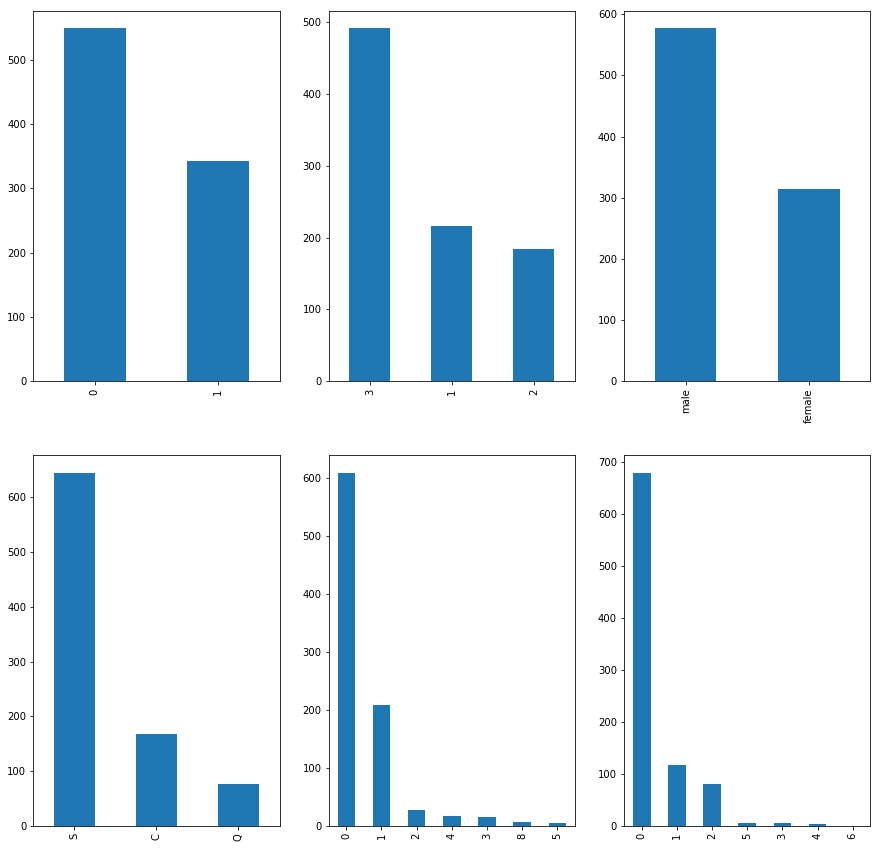

In [103]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

for idx, col in enumerate(['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp','Parch']):
    row, cols = (idx // 3), (idx % 3)
    #ax[row, cols].bar(titanic_raw_df[col].value_counts(dropna=False))
    titanic_raw_df[col].value_counts().plot(kind='bar', ax=ax[row, cols])
plt.show()